Instalação da biblioteca

In [1]:
!pip install pandas-montecarlo

  Created wheel for pandas-montecarlo: filename=pandas_montecarlo-0.0.2-cp36-none-any.whl size=7554 sha256=2664df0821c15b6f38aaa75db30f9591cd8903c1fcde9a96e266e99c0efd7e03
  Stored in directory: /root/.cache/pip/wheels/8c/29/44/622bf8ea542ec73a0901a765b9102dd49f9e1076be3efc5411
Successfully built pandas-montecarlo


Baixar a base direto do repositório da biblioteca pandas!

- Base dos valores da bolsa do ativo Yahoo

In [3]:
from pandas_datareader import data

df = data.get_data_yahoo("SPY")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-12,201.759995,200.910004,201.419998,201.520004,56395600.0,182.660446
2015-10-13,202.160004,200.050003,200.649994,200.250000,88038700.0,181.509308
2015-10-14,200.869995,198.940002,200.179993,199.289993,99106200.0,180.639114
2015-10-15,202.360001,199.639999,200.080002,202.350006,134142200.0,183.412781
2015-10-16,203.289993,201.919998,202.830002,203.270004,114580100.0,184.246704


Verificação dos dados estatísticos da base

In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,262.692113,259.869841,261.345981,261.385893,9.046337e+07,249.960957
std,39.767125,39.210829,39.523390,39.480687,4.940800e+07,44.204097
min,184.100006,181.020004,182.339996,182.860001,2.027000e+07,166.733185
25%,227.085007,225.885002,226.534996,226.519997,5.853510e+07,210.922211
50%,267.559998,264.119995,266.309998,265.779999,7.700320e+07,254.120758
75%,290.565002,288.205002,289.599991,289.300003,1.036846e+08,280.955719
max,358.750000,353.429993,355.869995,357.700012,3.922207e+08,356.273865


Criando uma coluna nova chamada 'return' com os valores de ganho (%) do valor de fechamento entre um dia e outro.

***ESSA BIBLIOTECA DE MC NECESSITA DO VALOR EM TERMOS DE TAXA, OU SEJA, A VARIAÇÃO DE DETERMINADA GRANDEZA EM RELAÇÃO AO REGISTRO ANTERIOR***

A RESPOSTA DO ALGORITMO É O VALOR ACUMULADO DESSA TAXA GERADA.

In [8]:
adj_close_real = df['Adj Close']  # Salvar a coluna para fazer uma analise temporal seguinte
df['return'] = df['Adj Close'].pct_change().fillna(0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,return
Date,,,,,,,
2015-10-12,201.759995,200.910004,201.419998,201.520004,56395600.0,182.660446,0.000000
2015-10-13,202.160004,200.050003,200.649994,200.250000,88038700.0,181.509308,-0.006302
2015-10-14,200.869995,198.940002,200.179993,199.289993,99106200.0,180.639114,-0.004794
2015-10-15,202.360001,199.639999,200.080002,202.350006,134142200.0,183.412781,0.015355
2015-10-16,203.289993,201.919998,202.830002,203.270004,114580100.0,184.246704,0.004547


In [6]:
(188.327835-187.150909)/187.150909

0.006288646987015064

Verificar o histograma da variavel de saída. 
Eixo x com os valores de saída, eixo y com a quantidade de ocorrências.

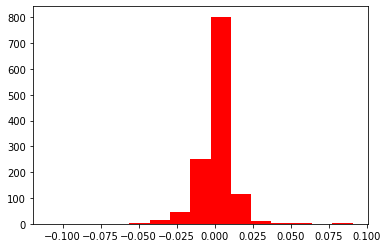

In [13]:
import matplotlib.pyplot as plt
# Histograma da saída
num_bins = 15
n1, bins1, patches1 = plt.hist(df['return'], num_bins, facecolor='red')

Verificar o histograma de todas as variaveis de entrada. 
Eixo x com os valores de saída, eixo y com a quantidade de ocorrências.

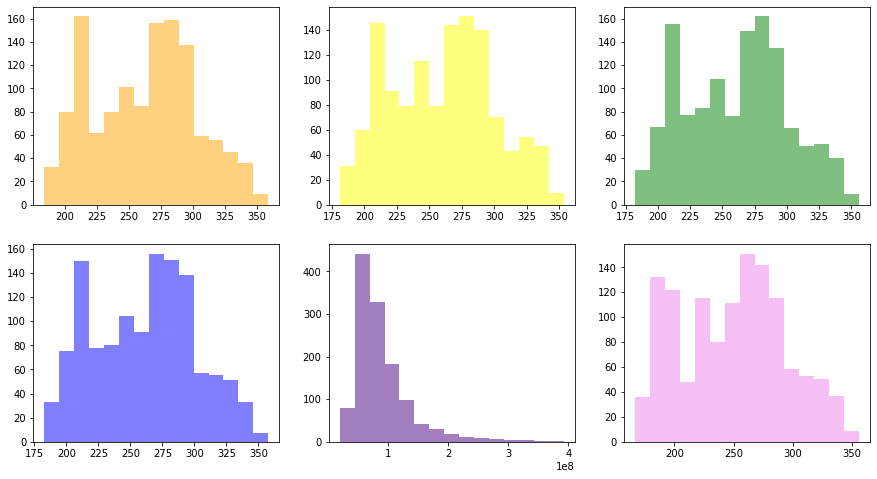

In [14]:
# Histograma das entradas
num_bins = 15
fig, plts = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
n1, bins1, patches1 = plts[0,0].hist(df['High'], num_bins, facecolor='orange', alpha=0.5)
n2, bins2, patches2 = plts[0,1].hist(df['Low'], num_bins, facecolor='yellow', alpha=0.5)
n3, bins3, patches3 = plts[0,2].hist(df['Open'], num_bins, facecolor='green', alpha=0.5)
n4, bins4, patches4 = plts[1,0].hist(df['Close'], num_bins, facecolor='blue', alpha=0.5)
n5, bins5, patches5 = plts[1,1].hist(df['Volume'], num_bins, facecolor='indigo', alpha=0.5)
n6, bins6, patches6 = plts[1,2].hist(df['Adj Close'], num_bins, facecolor='violet', alpha=0.5)

Aplicação do método de MC com o gráfico

In [28]:
import pandas_montecarlo
mc = df['return'].montecarlo(sims=50)

In [29]:
mc.data.head(10)

,original,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.005414,-0.000243,-0.003429,0.000188,0.004253,-0.003585,0.004095,-0.001723,0.001296,0.009900,-0.003655,0.000930,0.001414,-0.000997,0.006766,0.058390,-0.004777,-0.000524,0.003937,-0.000538,-0.006462,0.003858,-0.008366,-0.025509,-0.000066,-0.007516,0.003067,0.003383,0.002260,0.004751,-0.024941,-0.001102,-0.050633,-0.003429,0.003411,0.003365,-0.002691,0.000930,0.009818,-0.007182,-0.000998,-0.016700,0.000930,0.002839,0.013308,-0.017665,0.007519,-0.011513,0.003674
1,-0.006302,-0.000928,0.001268,-0.003772,0.008655,0.002642,-0.000361,-0.001394,-0.013613,0.001950,0.016137,0.001292,0.001084,0.001269,-0.006126,0.003771,0.001222,0.019503,0.005448,-0.003931,-0.032402,0.007582,0.000200,-0.005693,0.000000,-0.000998,0.003858,-0.001045,0.006952,-0.009130,0.002057,-0.001190,0.015552,-0.001722,-0.095677,0.011831,-0.001019,0.004657,-0.003772,-0.000916,-0.009988,-0.001670,0.008131,0.002638,0.003547,0.004163,0.002949,0.013022,-0.032402,0.000205
2,-0.004794,0.000242,0.015831,-0.024997,-0.000041,0.001829,-0.002083,-0.003709,-0.029568,-0.008366,-0.017665,-0.011501,0.001798,0.001969,-0.008254,0.014890,0.010211,-0.009047,0.000046,0.002535,-0.002987,-0.008366,-0.006126,-0.003709,0.003154,0.000786,0.002266,0.000482,0.003920,-0.013530,0.004253,0.014479,-0.000278,0.000487,0.000000,-0.002933,-0.023991,-0.013960,-0.002500,-0.001940,0.001899,0.003260,-0.003267,-0.005580,0.000497,0.009536,0.021409,-0.003889,0.001268,-0.001651
3,0.015355,-0.027323,-0.001114,0.033496,0.002638,0.000497,0.000839,0.002333,0.001346,-0.001525,0.004604,0.011295,-0.003026,0.007296,-0.013475,0.025629,-0.000389,-0.017618,0.015241,-0.002159,0.008327,0.002049,0.000377,0.007995,-0.003772,0.001701,0.006415,-0.000845,0.009239,0.014697,-0.012839,-0.006630,0.000377,0.002839,-0.037509,-0.004310,0.010184,-0.012614,0.004485,-0.000444,-0.006261,-0.001756,0.003517,0.004929,-0.013008,-0.003655,0.002923,-0.007088,-0.001143,0.000786
4,0.004547,-0.007245,0.019703,-0.021466,-0.000695,-0.021466,-0.009768,0.004576,-0.000862,0.000031,0.002210,0.014697,-0.008708,0.007027,0.001155,-0.008495,-0.002955,0.002123,0.015866,-0.006059,0.001330,0.000424,0.001246,0.001292,0.001602,-0.017910,-0.009808,-0.009076,-0.023191,-0.001879,0.008104,-0.001722,0.007750,-0.007780,0.003339,0.008782,-0.003725,-0.006700,0.004738,0.006812,0.016137,0.010672,-0.018506,0.001576,-0.013511,0.010698,-0.005091,-0.005580,0.016609,-0.001919
5,0.000492,0.003527,-0.000468,0.002224,0.004018,0.008655,0.003661,0.000839,0.002312,0.010007,-0.013008,-0.000894,-0.078095,-0.003628,0.000360,-0.003429,-0.000289,0.004163,0.000205,-0.001788,0.016417,-0.048748,0.002751,0.000274,-0.006126,-0.001106,0.000190,0.005089,-0.030073,0.016417,-0.000308,0.002257,0.004673,0.009666,0.016167,0.003499,-0.001563,0.006503,0.000603,-0.016531,0.001292,-0.017910,-0.004310,0.009074,-0.001649,-0.002328,0.003547,0.011612,0.000046,-0.004777
6,-0.001278,-0.002667,-0.013613,-0.001148,0.002060,0.001200,-0.001143,-0.001490,-0.017910,-0.005548,0.001859,-0.016915,0.002751,0.002910,0.006381,0.004929,0.012773,-0.001788,0.000718,0.003408,-0.001967,-0.057649,0.000497,0.000497,-0.095677,0.004657,0.022195,-0.031663,-0.003293,0.003858,0.012859,0.058390,0.017027,0.000798,0.006200,-0.002984,0.008759,-0.000729,0.000424,-0.000041,0.007005,-0.001318,-0.003623,0.006952,-0.001459,-0.011501,-0.016278,0.013345,-0.002048,-0.007712
7,-0.006204,-0.001867,0.001950,-0.009076,0.000603,-0.008795,0.003930,-0.002455,0.008193,-0.001147,-0.001105,-0.014115,0.008249,-0.000140,-0.021466,0.002751,0.000386,0.009044,-0.003531,0.005035,0.000530,0.004285,0.002638,-0.003429,0.006009,0.002336,0.016167,-0.001821,0.006415,0.053992,0.008176,0.007292,0.012383,0.001881,-0.000167,-0.003840,-0.009808,-0.003556,0.016167,0.003411,0.007035,0.016144,-0.006101,0.006170,0.008992,-0.017364,0.004547,0.002058,-0.006805,-0.007457
8,0.016894,-0.005580,0.006700,-0.001815,-0.000121,0.

In [30]:
mc.data.describe()

,original,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580,0.000580
std,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860,0.011860
min,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424
25%,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947,-0.002947
50%,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
75%,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355,0.005355
max,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.0

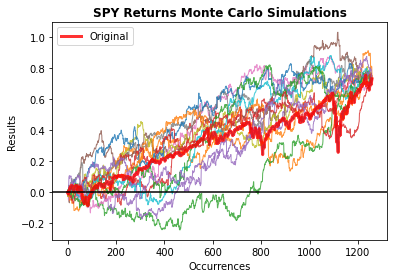

In [20]:
mc.plot(title="SPY Returns Monte Carlo Simulations")

In [21]:
mc.stats

{'bust': 0.0,
 'goal': 1.0,
 'max': 0.730514063617404,
 'maxdd': -0.2413089586492182,
 'mean': 0.730514063617404,
 'median': 0.730514063617404,
 'min': 0.7305140636174039,
 'std': 2.967195843610875e-17}

In [23]:
mc_variations = mc.data
mc_variations.head(2)
mc_variations.drop(columns=["original"])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.009818,-0.000640,0.002420,-0.002500,0.004547,-0.005495,0.005381,-0.024941,0.012855,0.002532,0.012778,0.016137,0.001706,0.007292
1,0.002811,-0.024997,0.001881,0.000503,-0.010003,-0.005399,-0.001518,-0.001255,-0.001967,0.000591,-0.001215,-0.004152,0.005524,-0.001530
2,-0.021248,0.010498,0.003260,0.001312,-0.001932,-0.014441,0.007677,0.008662,0.000103,0.005381,-0.001097,0.001296,0.005146,-0.002844
3,0.006783,0.004384,0.012773,-0.005223,0.014879,-0.021315,0.008318,0.001634,-0.000289,-0.000523,-0.002083,-0.002500,-0.026473,0.002345
4,0.002312,-0.018685,-0.001366,-0.002285,-0.019381,-0.002984,0.017402,0.004388,0.010721,0.004253,0.003297,-0.002328,0.002353,0.000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.014697,0.016417,0.006200,-0.004599,0.004751,0.005998,-0.001114,-0.011966,-0.027323,-0.008795,0.005955,0.000718,-0.003924,0.004641
1255,-0.003568,-0.001278,-0.001606,-0.002359,-0.001821,0.001330,0.006016,0.001074,0.010666,0.010026,-0.026423,-0.006904,0.043306,-0.041823
1256,0.000510,0.010921,-0.007712,-0.019050,0.007296,0.015552,0.001897,-0.000845,-0.014905,0.001574,0.001292,-0.016029,-0.028632,-0.013461
1257,-0.001067,-0.000248,0.001558,-0.001173,-0.003238,0.001419,0.000772,-0.012839,0.000598,0.006328,-0.003709,-0.002987,0.015207,-0.023751


In [24]:
adj_close_valor_inicial = adj_close_real[0]
mc_acumulated = mc_variations
for j in range(len(mc_acumulated.columns)):
  print("Iniciando recalculo da coluna: ", str(j))
  for i in range(len(mc_acumulated.iloc[:,j])):
    mc_acumulated.iloc[i, j] = mc_acumulated.iloc[i-1,j] + mc_variations.iloc[i, j]
    if i == 0:
      mc_acumulated.iloc[i, j] = adj_close_valor_inicial + mc_variations.iloc[i, j]

Iniciando recalculo da coluna:  0
Iniciando recalculo da coluna:  1
Iniciando recalculo da coluna:  2
Iniciando recalculo da coluna:  3
Iniciando recalculo da coluna:  4
Iniciando recalculo da coluna:  5
Iniciando recalculo da coluna:  6
Iniciando recalculo da coluna:  7
Iniciando recalculo da coluna:  8
Iniciando recalculo da coluna:  9
Iniciando recalculo da coluna:  10
Iniciando recalculo da coluna:  11
Iniciando recalculo da coluna:  12
Iniciando recalculo da coluna:  13
Iniciando recalculo da coluna:  14


In [25]:
mc_acumulated.head()

,original,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,182.669376,182.592169,182.658616,182.666656,182.659653,182.666407,182.645183,182.662630,182.628788,182.670035,182.662116,182.664516,182.688882,182.638217,182.687359
1,182.663074,182.594981,182.633619,182.668537,182.660156,182.656404,182.639784,182.661112,182.627533,182.668068,182.662707,182.663301,182.684731,182.643741,182.685829
2,182.658280,182.573732,182.644117,182.671797,182.661468,182.654471,182.625343,182.668790,182.636195,182.668171,182.668088,182.662205,182.686027,182.648887,182.682985
3,182.673635,182.580516,182.648501,182.684570,182.656244,182.669350,182.604029,182.677108,182.637829,182.667882,182.667564,182.660122,182.683527,182.622413,182.685330
4,182.678181,182.582828,182.629816,182.683204,182.653960,182.649969,182.601045,182.694510,182.642217,182.678603,182.671817,182.663419,182.681199,182.624766,182.685558


In [26]:
import matplotlib.pyplot as plt

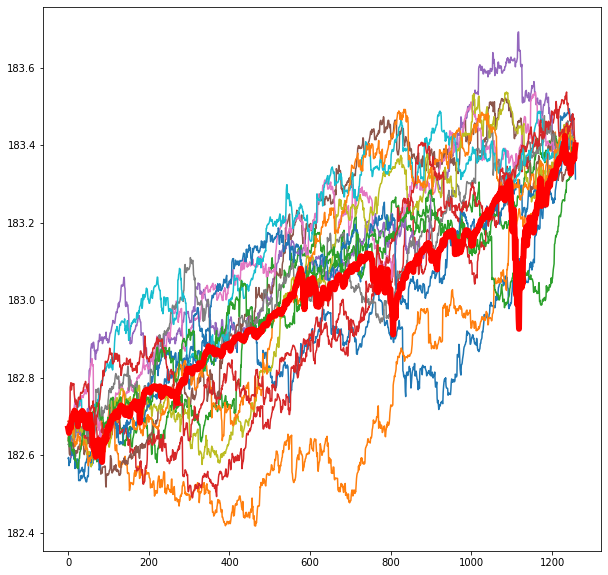

In [27]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.plot(mc_acumulated.iloc[:,1:])
ax.plot(mc_acumulated.iloc[:,0], c='r', linewidth=6.0)

## Fazer agora com a base de passageiros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
workdir_path = '/content/drive/My Drive/Apoio à Decisão Sob Incerteza/ADI - Aula 02 - Método de Monte Carlo/Exercícios/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

In [ ]:
#Verificar se a pasta mapeada contem os arquivos abaixo
!ls

'1. Aplicação Monte Carlo.ipynb'	 '3. Incerteza em series.ipynb'
'1.Aplicacao Monte Carlo.mp4'		  Bike.csv
'2. Amostragem Aleatoria_solução.ipynb'   Passengers.csv
'2. Amostragem Aleatoria Solucao.mp4'


Importar e verificar a base - Lembrando que essa biblioteca só opera com valores de taxa, ou seja, valores que variam em relação a alguma outra variável

In [ ]:
import pandas as pd

In [ ]:
dataset_train.head()

Plote uma figura com a taxa de crescimento dos passageiros

In [ ]:
import matplotlib.pyplot as plt

Fazer a análise pelo método de Monte Carlo e plotar

In [ ]:
import pandas_montecarlo

In [ ]:
# Chamada do método



In [ ]:
# Plot



## Solução

In [ ]:
import pandas as pd
dataset_train = pd.read_csv('Passengers.csv')
training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si
dataset_train.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 to Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dataset_train.shape[0]
passengersRate = [0] * dataset_train.shape[0]
acumulated = [0] * dataset_train.shape[0]
# acumulated, passengersRate

In [ ]:
n_dates = dataset_train.shape[0]
for index in range(n_dates):
  if index == 0:
    passengersRate[index] = 0
    acumulated[index] = 0
  else:
    passengersRate[index] = - dataset_train.iloc[(index-1),1] + dataset_train.iloc[index,1]
    acumulated[index] = passengersRate[index] + acumulated[index-1]
dataset_train['Passengers Result'] = passengersRate
dataset_train['Passengers Acumulated'] = acumulated
dataset_train.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 to Dec 60,Passengers Result,Passengers Acumulated
0,1949-01,112,0,0
1,1949-02,118,6,6
2,1949-03,132,14,20
3,1949-04,129,-3,17
4,1949-05,121,-8,9


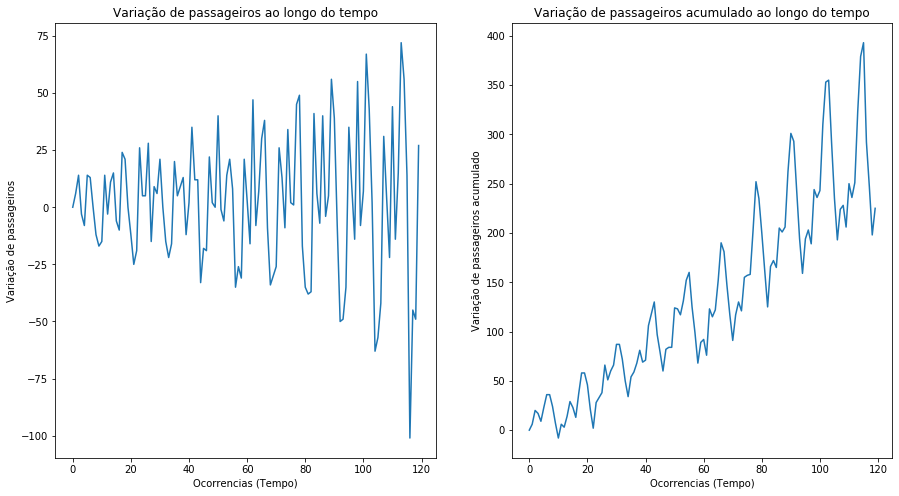

In [ ]:
import matplotlib.pyplot as plt
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt1.plot(passengersRate)
plt1.set_xlabel("Ocorrencias (Tempo)")
plt1.set_ylabel("Variação de passageiros")
plt1.set_title("Variação de passageiros ao longo do tempo")
plt2.plot(acumulated)
plt2.set_xlabel("Ocorrencias (Tempo)")
plt2.set_ylabel("Variação de passageiros acumulado")
plt2.set_title("Acumulado de passageiros ao longo do tempo")
plt.show()

In [ ]:
import pandas_montecarlo
mc = dataset_train['Passengers Result'].montecarlo(sims=100)
mc

<pandas_montecarlo.montecarlo.<locals>.__make_object__ at 0x7f5c301a4208>

In [ ]:
mc.stats

{'bust': 0.9,
 'goal': 0.1,
 'max': 225,
 'maxdd': -405,
 'mean': 225.0,
 'median': 225.0,
 'min': 225,
 'std': 0.0}

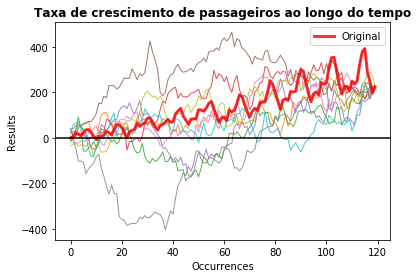

In [ ]:
mc.plot(title="Crescimento de passageiros ao longo do tempo")

In [ ]:
mc.data

,original,1,2,3,4,5,6,7,8,9
0,0,-16,-15,21,39,40,9,6,-35,22
1,6,34,11,7,1,-35,-19,-17,6,35
2,14,5,40,0,14,2,-18,-34,9,9
3,-3,40,56,-15,0,39,9,-57,-16,5
4,-8,-12,-49,5,0,6,5,0,5,-25
...,...,...,...,...,...,...,...,...,...,...
115,14,-15,55,-31,-8,-8,0,8,56,14
116,-101,13,9,30,7,7,-8,-33,35,5
117,-45,21,-9,26,21,-35,-14,-31,5,2
118,-49,14,-8,-16,38,24,12,45,-14,7


In [ ]:
mc.data.iloc[-1,1:]

1     4
2     0
3    15
4    -1
5    30
6     7
7    -3
8   -50
9     0
Name: 119, dtype: int64

In [ ]:
mc.data.iloc[-1,1:].median()

0.0

# Utilizando a biblioteca para o exercicio da aula anterior:

O objetivo é prever uma variavel de saída atraves de 2 outras variaveis, ou seja, f(x1,x2)

##Declarar a função

In [31]:
import math
def Griewank(input):
    sum = 0
    for x in input:
        sum += x * x
    product = 1
    for i in range(len(input)):
        product *= math.cos(input[i] / math.sqrt(i + 1))
    return 1 + sum / 4000 - product

In [32]:
#Teste de chamada para duas variáveis
Griewank([2,3])

0.7855494848011055

##Amostragem da função a ser aproximada

In [33]:
import random
n = 2
samples = 1000

random_samples = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.random())
  random_samples.append(input)

#converte para numpy array
import numpy as np
random_samples = np.array(random_samples)

random_samples[0:5] # 5 primeiras amostras

array([[0.5315053 , 0.21001762],
       [0.7583245 , 0.93110262],
       [0.35618695, 0.32938352],
       [0.85953339, 0.78935666],
       [0.95442635, 0.47482083]])

In [34]:
#Saída para cada input
y = []
for i in random_samples:
  y.append(Griewank(i))

##Separar base em treino e validação

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(random_samples, y, test_size = 0.2, shuffle=True)

##Treinamento da Rede Neural para aproximar a função

In [36]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [37]:
# Importando as bibliotecas do Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [38]:
# Iniciando a Rede Neural
classifier = Sequential()

# Adicionando a camada de input e a primeira camada escondida
classifier.add(Dense(units = 6, activation = 'relu', input_dim = n))
classifier.add(Dropout(rate = 0.1))

# Adicionando a camada de saída
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede neural
classifier.compile(optimizer = 'adam', loss = 'mse')

# Visualização das camadas da rede
classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Treinando a rede neural
trained_model = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500, 
                               validation_data = (X_val,y_val))


Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 379us/step - loss: 0.1322 - val_loss: 0.1228
Epoch 2/500
800/800 [==============================] - 0s 33us/step - loss: 0.1267 - val_loss: 0.1168
Epoch 3/500
800/800 [==============================] - 0s 34us/step - loss: 0.1202 - val_loss: 0.1108
Epoch 4/500
800/800 [==============================] - 0s 34us/step - loss: 0.1142 - val_loss: 0.1045
Epoch 5/500
800/800 [==============================] - 0s 36us/step - loss: 0.1078 - val_loss: 0.0975
Epoch 6/500
800/800 [==============================] - 0s 35us/step - loss: 0.1000 - val_loss: 0.0900
Epoch 7/500
800/800 [==============================] - 0s 31us/step - loss: 0.0922 - val_loss: 0.0817
Epoch 8/500
800/800 [==============================] - 0s 27us/step - loss: 0.0834 - val_loss: 0.0729
Epoch 9/500
800/800 [==============================] - 0s 30us/step - loss: 0.0744 - val_loss: 0.0637
Epoch 10/500
800/800 [============

In [40]:
!pip install pandas-montecarlo

In [41]:
import pandas as pd

x_train_df = pd.DataFrame(X_train)
x_train_df.head()

,0,1
0,0.683720,0.938789
1,0.214228,0.637248
2,0.761794,0.238963
3,0.593968,0.240736
4,0.216812,0.505227


In [42]:
n_experimentos = 4

In [43]:
import pandas_montecarlo

mc_x1 = x_train_df[0].montecarlo(sims=n_experimentos+1)
mc_x2 = x_train_df[1].montecarlo(sims=n_experimentos+1)
mc_x1.data

,original,1,2,3,4
0,0.683720,0.727565,0.750513,0.766894,0.899763
1,0.214228,0.794987,0.518206,0.819611,0.655899
2,0.761794,0.056078,0.497661,0.715093,0.462948
3,0.593968,0.881517,0.531871,0.100031,0.315032
4,0.216812,0.815808,0.889742,0.863056,0.191297
...,...,...,...,...,...
795,0.815072,0.150736,0.737263,0.053499,0.966278
796,0.932700,0.366751,0.637345,0.512444,0.368865
797,0.484026,0.756796,0.765682,0.764082,0.145091
798,0.011330,0.637345,0.330642,0.090985,0.288715


In [44]:
mc_x2.data

,original,1,2,3,4
0,0.938789,0.919855,0.564571,0.474821,0.780415
1,0.637248,0.238963,0.139695,0.173343,0.398327
2,0.238963,0.731514,0.589227,0.703999,0.410937
3,0.240736,0.207623,0.248088,0.752153,0.739127
4,0.505227,0.245105,0.564339,0.858010,0.095921
...,...,...,...,...,...
795,0.242474,0.708843,0.215864,0.130294,0.908400
796,0.544068,0.209112,0.596782,0.702139,0.111578
797,0.637310,0.761047,0.817469,0.608023,0.701134
798,0.113127,0.921203,0.398061,0.591464,0.668998


In [45]:
mc_all_data = pd.DataFrame()
for i in range(n_experimentos):
  columnNameX1 = "X1_MC_Serie" + str(i)
  mc_all_data[columnNameX1] = mc_x1.data[i+1]
  columnNameX2 = "X2_MC_Serie" + str(i)
  mc_all_data[columnNameX2] = mc_x2.data[i+1]

mc_all_data

,X1_MC_Serie0,X2_MC_Serie0,X1_MC_Serie1,X2_MC_Serie1,X1_MC_Serie2,X2_MC_Serie2,X1_MC_Serie3,X2_MC_Serie3
0,0.727565,0.919855,0.750513,0.564571,0.766894,0.474821,0.899763,0.780415
1,0.794987,0.238963,0.518206,0.139695,0.819611,0.173343,0.655899,0.398327
2,0.056078,0.731514,0.497661,0.589227,0.715093,0.703999,0.462948,0.410937
3,0.881517,0.207623,0.531871,0.248088,0.100031,0.752153,0.315032,0.739127
4,0.815808,0.245105,0.889742,0.564339,0.863056,0.858010,0.191297,0.095921
...,...,...,...,...,...,...,...,...
795,0.150736,0.708843,0.737263,0.215864,0.053499,0.130294,0.966278,0.908400
796,0.366751,0.209112,0.637345,0.596782,0.512444,0.702139,0.368865,0.111578
797,0.756796,0.761047,0.765682,0.817469,0.764082,0.608023,0.145091,0.701134
798,0.637345,0.921203,0.330642,0.398061,0.090985,0.591464,0.288715,0.668998


In [46]:
mc_all_data.iloc[:,0:2]

,X1_MC_Serie0,X2_MC_Serie0
0,0.727565,0.919855
1,0.794987,0.238963
2,0.056078,0.731514
3,0.881517,0.207623
4,0.815808,0.245105
...,...,...
795,0.150736,0.708843
796,0.366751,0.209112
797,0.756796,0.761047
798,0.637345,0.921203


In [47]:
mc = mc_all_data.iloc[:,0:2]

# Previsão da base de teste MC
y_pred = classifier.predict(X_train)
y_test = classifier.predict(mc)

In [48]:
pd.DataFrame(y_pred).describe()

,0
count,800.000000
mean,0.215503
std,0.128811
min,0.022919
25%,0.105553
50%,0.188094
75%,0.332438
max,0.472986


In [ ]:
pd.DataFrame(y_test).describe()

,0
count,800.000000
mean,0.226837
std,0.124797
min,0.032484
25%,0.114087
50%,0.226897
75%,0.311315
max,0.539169


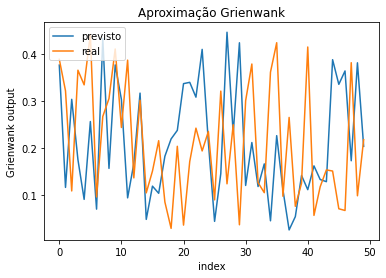

In [49]:
import matplotlib.pyplot as plt

#Real vs. Previsto: parcial
small_y_test = y_test[0:50]
small_y_pred = y_pred[0:50]

plt.plot(small_y_pred)
plt.plot(small_y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('Grienwank output')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

# Em construção...

https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [ ]:
import pandas as pd
dataset_train = pd.read_excel('AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
# training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si
dataset_train.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
dataset_train.drop(columns=['Date_Time'],inplace=True)

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 950.4 KB


In [ ]:
len(dataset_train)

9357

In [ ]:
import numpy as np

empty_lines, emptycolumns = np.where(pd.isnull(dataset_train))
empty_lines

array([], dtype=int64)

In [ ]:
dataset_train.drop(empty_lines,inplace=True)

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [ ]:
cols = dataset_train.columns
for j in cols:
    for i in range(0,len(dataset_train)):
       if dataset_train[j][i] == -200:
           dataset_train[j][i] = dataset_train[j][i-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
train_size = int(len(dataset_train) * 0.7)
train, test = dataset_train[0:train_size], dataset_train[train_size:len(dataset_train)]

In [ ]:
train_X, train_Y = train.loc[:,train.columns != 'T'], train.loc[:,train.columns == 'T']
test_X, test_Y = test.loc[:,test.columns != 'T'], test.loc[:,test.columns == 'T']

## Treinamento

In [ ]:
%tensorflow_version 1.x

In [ ]:
# Importando as bibliotecas do Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
n = train_X.shape[1]

In [ ]:
# Iniciando a Rede Neural
regressor = Sequential()

# Adicionando a camada de input e a primeira camada escondida
regressor.add(Dense(units = 6, activation = 'linear', input_dim = n))
regressor.add(Dropout(rate = 0.1))

# Adicionando a camada de saída
regressor.add(Dense(units = 1, activation = 'linear'))

# Compilando a rede neural
regressor.compile(optimizer = 'adam', loss = 'mse')

# Visualização das camadas da rede
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinando a rede neural
trained_model = regressor.fit(train_X, train_Y, batch_size = 64, epochs = 500, 
                               validation_data = (test_X, test_Y))

Train on 6549 samples, validate on 2808 samples
Epoch 1/500
6549/6549 [==============================] - 0s 35us/step - loss: 356229.7995 - val_loss: 62095.0188
Epoch 2/500
6549/6549 [==============================] - 0s 15us/step - loss: 83768.0089 - val_loss: 43131.8655
Epoch 3/500
6549/6549 [==============================] - 0s 15us/step - loss: 62781.5747 - val_loss: 33755.5200
Epoch 4/500
6549/6549 [==============================] - 0s 15us/step - loss: 46589.2814 - val_loss: 23605.0412
Epoch 5/500
6549/6549 [==============================] - 0s 16us/step - loss: 35966.3120 - val_loss: 17897.4015
Epoch 6/500
6549/6549 [==============================] - 0s 15us/step - loss: 24608.8953 - val_loss: 13934.9890
Epoch 7/500
6549/6549 [==============================] - 0s 16us/step - loss: 19324.0844 - val_loss: 10579.5971
Epoch 8/500
6549/6549 [==============================] - 0s 16us/step - loss: 13888.3264 - val_loss: 8425.8521
Epoch 9/500
6549/6549 [==============================] -

In [ ]:
# Previsão da base de teste
y_pred = regressor.predict(test_X)

Observations: 2808
Real Observations: 2808
Pred Observations: 2808


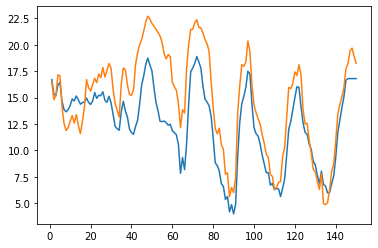

In [ ]:
import matplotlib.pyplot as plt

print('Observations: %d' % (len(test_Y)))
print('Real Observations: %d' % (len(test_Y)))
print('Pred Observations: %d' % (len(y_pred)))
plt.plot([None for i in train_Y] + [x for x in np.array(test_Y['T'])[:150]])
plt.plot([None for i in train_Y] + [x for x in y_pred[:150]])
plt.show()

Aplicar a técnica de Monte Carlo